In [285]:
import pandas as pd

In [286]:
# FIle path
africa_file = "Child mortality rates_Africa.csv"
americas_file = "Child mortality rates_Americas.csv"
eastern_mediterranean_file = "Child mortality rates_Eastern_Mediterranean.csv"
europe_file = "Child mortality rates_Europe.csv"
south_east_asia_file = "Child mortality rates_South_East_Asia.csv"
western_pacific_file = "Child mortality rates_Western_Pacific.csv"
infant_nutrition_file = "Infant nutrition data by country.csv"

# 1. Data Processing
## 1.1. Organise datasets for UFMR (i.e., Under Five Mortality Rates)

In [287]:
# Read csv(s)
df_africa = pd.read_csv(africa_file, header=[0,1])
df_americas = pd.read_csv(americas_file, header=[0,1])
df_eastern_mediterranean = pd.read_csv(eastern_mediterranean_file, header=[0,1])
df_europe = pd.read_csv(europe_file, header=[0,1])
df_south_east_asia = pd.read_csv(south_east_asia_file, header=[0,1])
df_western_pacific = pd.read_csv(western_pacific_file, header=[0,1])

In [288]:
# Desiplay Column
# 各データフレームの列名を確認し、列ラベルの形状をチェック
print("df_africa.columns.values:", df_africa.columns.values)

df_africa.columns.values: [('Unnamed: 0_level_0', 'Countries, territories and areas')
 ('Unnamed: 1_level_0', 'Year')
 ('Under-five mortality rate (per 1000 live births) (SDG 3.2.1)', ' Both sexes')
 ('Under-five mortality rate (per 1000 live births) (SDG 3.2.1)', ' Male')
 ('Under-five mortality rate (per 1000 live births) (SDG 3.2.1)', ' Female')
 ('Number of deaths among children under-five', ' Both sexes')
 ('Number of deaths among children under-five', ' Male')
 ('Number of deaths among children under-five', ' Female')]


In [289]:
# Organise Column
if len(df_africa.columns.values[0]) == 2:
    df_africa.columns = [f'{i}_{j}' for i, j in df_africa.columns.values]
else:
    # 例えば階層が1つしかない場合や、3階層の場合
    df_africa.columns = [f'{i}' if isinstance(i, str) else '_'.join([str(x) for x in i]) for i in df_africa.columns.values]

In [290]:
# Organise Column
for df in [df_americas, df_eastern_mediterranean, df_europe, df_south_east_asia, df_western_pacific]:
    if len(df.columns.values[0]) == 2:
        df.columns = [f'{i}_{j}' for i, j in df.columns.values]
    else:
        # 階層が1つしかない場合や、階層が異なる場合
        df.columns = [f'{i}' if isinstance(i, str) else '_'.join([str(x) for x in i]) for i in df.columns.values]

# 結果を確認
print(df_africa.columns)
print(df_europe.columns)

Index(['Unnamed: 0_level_0_Countries, territories and areas',
       'Unnamed: 1_level_0_Year',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female',
       'Number of deaths among children under-five_ Both sexes',
       'Number of deaths among children under-five_ Male',
       'Number of deaths among children under-five_ Female'],
      dtype='object')
Index(['Unnamed: 0_level_0_Countries, territories and areas',
       'Unnamed: 1_level_0_Year',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male',
       'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female',
       'Number of deaths among children under-five_ Both sexes',
       'Number of deaths among children under-five_ Male'

In [291]:
# To simplify and organise the each column's name (Africa data set)
df_africa = df_africa.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_africa.head(5)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34 [19.71-25.37],23.98 [21.11-27.34],20.6 [18.07-23.5],21 567 [19 036-24 499],11 834 [10 414-13 487],9 733 [8 538-11 097]
1,Algeria,2020,22.9 [20.73-25.37],24.58 [22.19-27.29],21.14 [19.07-23.52],22 565 [20 434-24 999],12 373 [11 175-13 738],10 192 [9 191-11 335]
2,Algeria,2019,23.45 [21.73-25.36],25.13 [23.19-27.31],21.68 [19.98-23.59],23 456 [21 738-25 363],12 847 [11 849-13 951],10 609 [9 773-11 540]
3,Algeria,2018,23.98 [22.63-25.44],25.67 [24.1-27.38],22.2 [20.81-23.77],24 191 [22 834-25 660],13 234 [12 421-14 109],10 957 [10 269-11 728]
4,Algeria,2017,24.48 [23.41-25.61],26.18 [24.88-27.57],22.68 [21.51-23.96],24 709 [23 624-25 848],13 506 [12 828-14 210],11 203 [10 619-11 830]


In [292]:
# To simplify and organise the each column's name (Other's data sets)
df_americas = df_americas.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns') 
df_eastern_mediterranean = df_eastern_mediterranean.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns') 
df_europe = df_europe.rename ({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_south_east_asia = df_south_east_asia.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')
df_western_pacific = df_western_pacific.rename({'Unnamed: 0_level_0_Countries, territories and areas': 'Country',
                              'Unnamed: 1_level_0_Year': 'Year',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Both sexes': 'UFMR(per1000births)_Both',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Male': 'UFMR(per1000births)_Male',
                              'Under-five mortality rate (per 1000 live births) (SDG 3.2.1)_ Female': 'UFMR(per1000births)_Female',
                              'Number of deaths among children under-five_ Both sexes': 'Number_of_deaths_UF_Both',
                              'Number of deaths among children under-five_ Male': 'Number_of_deaths_UF_Male',
                              'Number of deaths among children under-five_ Female': 'Number_of_deaths_UF_Female',
                             }, axis='columns')

df_americas.head(5)


,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Anguilla,2021,4.05 [1.92-8.52],4.01 [1.91-8.44],4.06 [1.91-8.59],1 [0-1],0 [0-1],1 [0-1]
1,Anguilla,2020,4.18 [2.03-8.62],4.15 [2.01-8.55],4.21 [2.03-8.68],1 [0-1],0 [0-1],1 [0-1]
2,Anguilla,2019,4.33 [2.13-8.72],4.28 [2.11-8.64],4.39 [2.15-8.86],1 [0-1],0 [0-1],1 [0-1]
3,Anguilla,2018,4.49 [2.27-8.83],4.43 [2.25-8.72],4.54 [2.29-8.96],1 [0-1],0 [0-1],1 [0-1]
4,Anguilla,2017,4.64 [2.41-8.96],4.55 [2.37-8.77],4.73 [2.44-9.11],1 [0-1],0 [0-1],1 [0-1]


In [293]:
# Confirm shapes
print(df_africa.shape)
print(df_americas.shape)
print(df_eastern_mediterranean.shape)
print(df_europe.shape)
print(df_south_east_asia.shape)
print(df_western_pacific.shape)

(3054, 8)
(2586, 8)
(1364, 8)
(3017, 8)
(670, 8)
(1777, 8)


In [294]:
# Merge six dfs into one df as df_ufmr
dataframes = [df_africa, df_americas, df_eastern_mediterranean, df_europe, df_south_east_asia, df_western_pacific]
df_ufmr = pd.concat(dataframes, axis=0, ignore_index=True)
# Confirm shapes
df_ufmr.shape

(12468, 8)

In [295]:
# See whether this is successful merge
sum = df_africa.shape[0] + df_americas.shape[0]+ df_eastern_mediterranean.shape[0] + df_europe.shape[0] + df_south_east_asia.shape[0] + df_western_pacific.shape[0]

if sum==df_ufmr.shape[0]:
    print('This merge was successful.')

This merge was successful.


In [296]:
# Check information of df_ufmr.
df_ufmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12468 entries, 0 to 12467
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     12468 non-null  object
 1   Year                        12468 non-null  int64 
 2   UFMR(per1000births)_Both    12468 non-null  object
 3   UFMR(per1000births)_Male    12169 non-null  object
 4   UFMR(per1000births)_Female  12169 non-null  object
 5   Number_of_deaths_UF_Both    11174 non-null  object
 6   Number_of_deaths_UF_Male    11174 non-null  object
 7   Number_of_deaths_UF_Female  11174 non-null  object
dtypes: int64(1), object(7)
memory usage: 779.4+ KB


In [297]:
df_ufmr.head(10)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34 [19.71-25.37],23.98 [21.11-27.34],20.6 [18.07-23.5],21 567 [19 036-24 499],11 834 [10 414-13 487],9 733 [8 538-11 097]
1,Algeria,2020,22.9 [20.73-25.37],24.58 [22.19-27.29],21.14 [19.07-23.52],22 565 [20 434-24 999],12 373 [11 175-13 738],10 192 [9 191-11 335]
2,Algeria,2019,23.45 [21.73-25.36],25.13 [23.19-27.31],21.68 [19.98-23.59],23 456 [21 738-25 363],12 847 [11 849-13 951],10 609 [9 773-11 540]
3,Algeria,2018,23.98 [22.63-25.44],25.67 [24.1-27.38],22.2 [20.81-23.77],24 191 [22 834-25 660],13 234 [12 421-14 109],10 957 [10 269-11 728]
4,Algeria,2017,24.48 [23.41-25.61],26.18 [24.88-27.57],22.68 [21.51-23.96],24 709 [23 624-25 848],13 506 [12 828-14 210],11 203 [10 619-11 830]
5,Algeria,2016,24.92 [24.07-25.8],26.64 [25.54-27.78],23.11 [22.1-24.19],24 937 [24 083-25 816],13 624 [13 050-14 201],11 313 [10 814-11 838]
6,Algeria,2015,25.3 [24.65-25.98],27.03 [26.09-28.01],23.49 [22.61-24.41],24 898 [24 251-25 564],13 595 [13 116-14 085],11 303 [10 876-11 742]
7,Algeria,2014,25.67 [25.12-26.23],27.4 [26.53-28.29],23.85 [23.03-24.69],24 655 [24 127-25 197],13 459 [13 032-13 892],11 196 [10 811-11 592]
8,Algeria,2013,26.05 [25.5-26.62],27.79 [26.92-28.68],24.22 [23.38-25.08],24 470 [23 951-25 002],13 355 [12 935-13 781],11 115 [10 726-11 507]
9,Algeria,2012,26.49 [25.81-27.21],28.25 [27.29-29.26],24.65 [23.73-25.61],24 174 [23 551-24 822],13 188 [12 738-13 657],10 986 [10 574-11 415]


In [298]:
# Extract numerical data from each column (Number_of_deaths_UF_Both	, Number_of_deaths_UF_Male,  Number_of_deaths_UF_Female)
import re

columns_to_fix = [
    'Number_of_deaths_UF_Both',
    'Number_of_deaths_UF_Male',
    'Number_of_deaths_UF_Female'
]


def remove_spaces_and_extract_number(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'\s+', '', re.split(r"\[|\]", value)[0])
        return cleaned_value
    return value

for col in columns_to_fix:
    if col in df_ufmr.columns:
        df_ufmr[col] = df_ufmr[col].apply(remove_spaces_and_extract_number)

for col in columns_to_fix:
    df_ufmr[col] = pd.to_numeric(df_ufmr[col], errors='coerce')

print(df_ufmr[columns_to_fix].head())


   Number_of_deaths_UF_Both  Number_of_deaths_UF_Male  \
0                   21567.0                   11834.0   
1                   22565.0                   12373.0   
2                   23456.0                   12847.0   
3                   24191.0                   13234.0   
4                   24709.0                   13506.0   

   Number_of_deaths_UF_Female  
0                      9733.0  
1                     10192.0  
2                     10609.0  
3                     10957.0  
4                     11203.0  


In [299]:
df_ufmr.head(10)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34 [19.71-25.37],23.98 [21.11-27.34],20.6 [18.07-23.5],21567.0,11834.0,9733.0
1,Algeria,2020,22.9 [20.73-25.37],24.58 [22.19-27.29],21.14 [19.07-23.52],22565.0,12373.0,10192.0
2,Algeria,2019,23.45 [21.73-25.36],25.13 [23.19-27.31],21.68 [19.98-23.59],23456.0,12847.0,10609.0
3,Algeria,2018,23.98 [22.63-25.44],25.67 [24.1-27.38],22.2 [20.81-23.77],24191.0,13234.0,10957.0
4,Algeria,2017,24.48 [23.41-25.61],26.18 [24.88-27.57],22.68 [21.51-23.96],24709.0,13506.0,11203.0
5,Algeria,2016,24.92 [24.07-25.8],26.64 [25.54-27.78],23.11 [22.1-24.19],24937.0,13624.0,11313.0
6,Algeria,2015,25.3 [24.65-25.98],27.03 [26.09-28.01],23.49 [22.61-24.41],24898.0,13595.0,11303.0
7,Algeria,2014,25.67 [25.12-26.23],27.4 [26.53-28.29],23.85 [23.03-24.69],24655.0,13459.0,11196.0
8,Algeria,2013,26.05 [25.5-26.62],27.79 [26.92-28.68],24.22 [23.38-25.08],24470.0,13355.0,11115.0
9,Algeria,2012,26.49 [25.81-27.21],28.25 [27.29-29.26],24.65 [23.73-25.61],24174.0,13188.0,10986.0


In [300]:
# Extract numerical data from each column (UFMR(per1000births)_Both	, UFMR(per1000births)_Male,  UFMR(per1000births)_Female)
columns_to_clean = [
    'UFMR(per1000births)_Both',
    'UFMR(per1000births)_Male',
    'UFMR(per1000births)_Female'
]

def extract_main_value(value):
    if isinstance(value, str):
        main_value = re.search(r"[-+]?\d*\.\d+|\d+", value)
        if main_value:
            return float(main_value.group()) 
    return value

for col in columns_to_clean:
    if col in df_ufmr.columns:
        df_ufmr[col] = df_ufmr[col].apply(extract_main_value)

df_ufmr.head(10)

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
0,Algeria,2021,22.34,23.98,20.60,21567.0,11834.0,9733.0
1,Algeria,2020,22.90,24.58,21.14,22565.0,12373.0,10192.0
2,Algeria,2019,23.45,25.13,21.68,23456.0,12847.0,10609.0
3,Algeria,2018,23.98,25.67,22.20,24191.0,13234.0,10957.0
4,Algeria,2017,24.48,26.18,22.68,24709.0,13506.0,11203.0
5,Algeria,2016,24.92,26.64,23.11,24937.0,13624.0,11313.0
6,Algeria,2015,25.30,27.03,23.49,24898.0,13595.0,11303.0
7,Algeria,2014,25.67,27.40,23.85,24655.0,13459.0,11196.0
8,Algeria,2013,26.05,27.79,24.22,24470.0,13355.0,11115.0
9,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0


In [301]:
df_ufmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12468 entries, 0 to 12467
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     12468 non-null  object 
 1   Year                        12468 non-null  int64  
 2   UFMR(per1000births)_Both    12468 non-null  float64
 3   UFMR(per1000births)_Male    12169 non-null  float64
 4   UFMR(per1000births)_Female  12169 non-null  float64
 5   Number_of_deaths_UF_Both    11174 non-null  float64
 6   Number_of_deaths_UF_Male    11174 non-null  float64
 7   Number_of_deaths_UF_Female  11174 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 779.4+ KB


In [302]:
df_ufmr.describe(include='all')

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
count,12468,12468.000000,12468.000000,12169.000000,12169.000000,1.117400e+04,1.117400e+04,1.117400e+04
unique,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ghana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1988.890199,83.075723,82.904082,74.378112,6.107777e+04,3.223425e+04,2.884352e+04
std,NaN,19.991489,85.630877,82.630975,77.667921,2.821839e+05,1.434066e+05,1.389038e+05
min,NaN,1932.000000,1.720000,1.860000,1.560000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,1973.000000,18.137500,19.480000,15.750000,4.940000e+02,2.780000e+02,2.180000e+02
50%,NaN,1990.000000,49.740000,51.440000,43.170000,4.574000e+03,2.540500e+03,2.018000e+03
75%,NaN,2006.000000,122.552500,122.940000,109.890000,3.653050e+04,2.010025e+04,1.668200e+04


In [303]:
print(df_ufmr.isnull().any())

print(df_ufmr.isnull().sum())

Country                       False
Year                          False
UFMR(per1000births)_Both      False
UFMR(per1000births)_Male       True
UFMR(per1000births)_Female     True
Number_of_deaths_UF_Both       True
Number_of_deaths_UF_Male       True
Number_of_deaths_UF_Female     True
dtype: bool
Country                          0
Year                             0
UFMR(per1000births)_Both         0
UFMR(per1000births)_Male       299
UFMR(per1000births)_Female     299
Number_of_deaths_UF_Both      1294
Number_of_deaths_UF_Male      1294
Number_of_deaths_UF_Female    1294
dtype: int64


In [304]:
# Check data that has NaN.
df_ufmr[df_ufmr.isnull().any(axis=1)]

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female
63,Algeria,1958,241.55,245.21,237.62,NaN,NaN,NaN
64,Algeria,1957,242.33,246.00,238.28,NaN,NaN,NaN
65,Algeria,1956,242.84,246.49,238.88,NaN,NaN,NaN
66,Algeria,1955,243.80,247.37,239.85,NaN,NaN,NaN
67,Algeria,1954,244.49,248.26,240.53,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
12463,Viet Nam,1968,84.32,95.96,72.04,NaN,NaN,NaN
12464,Viet Nam,1967,85.00,96.90,72.50,NaN,NaN,NaN
12465,Viet Nam,1966,85.72,97.81,72.98,NaN,NaN,NaN
12466,Viet Nam,1965,86.32,98.59,73.56,NaN,NaN,NaN


<AxesSubplot:>

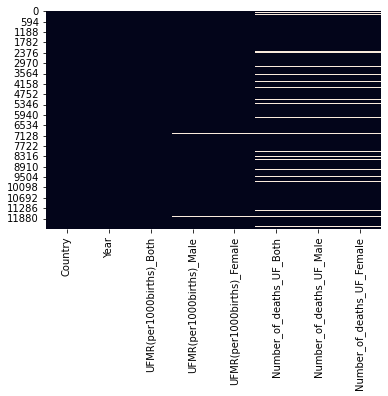

In [305]:
import seaborn as sns
# Check missing data
sns.heatmap(df_ufmr.isnull(), cbar=False)

# Findings: Given this map, missing values randomly happened.

In [306]:
df_ufmr.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
12463    3
12464    3
12465    3
12466    3
12467    3
Length: 12468, dtype: int64

In [307]:
Algeria_data = df_ufmr[df_ufmr['Country'] == 'Algeria']
print(Algeria_data.head(30))

    Country  Year  UFMR(per1000births)_Both  UFMR(per1000births)_Male  \
0   Algeria  2021                     22.34                     23.98   
1   Algeria  2020                     22.90                     24.58   
2   Algeria  2019                     23.45                     25.13   
3   Algeria  2018                     23.98                     25.67   
4   Algeria  2017                     24.48                     26.18   
5   Algeria  2016                     24.92                     26.64   
6   Algeria  2015                     25.30                     27.03   
7   Algeria  2014                     25.67                     27.40   
8   Algeria  2013                     26.05                     27.79   
9   Algeria  2012                     26.49                     28.25   
10  Algeria  2011                     27.08                     28.86   
11  Algeria  2010                     27.81                     29.63   
12  Algeria  2009                     28.71        

In [308]:
# Save the file as csv
df_ufmr.to_csv("cleaned_df_ufmr_v0.2.csv", index=False)

## 1.2. Organise the dataset for infant nutrition

In [480]:
df_nutrition = pd.read_csv(infant_nutrition_file)

In [481]:
df_nutrition.shape

(735, 4)

In [482]:
df_nutrition.head(5)

,"Countries, territories and areas",Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2018,NaN,57.5
1,Afghanistan,2015-2016,40.9,NaN
2,Afghanistan,2015,NaN,43.1 [40.1-46.2]
3,Albania,2017,NaN,36.5 [29.8-43.9]
4,Albania,2009,NaN,37.1 [27.1-48.5]


In [483]:
# To simplify and organise the each column's name (Africa data set)
df_nutrition = df_nutrition.rename({'Countries, territories and areas': 'Country'}, axis='columns')
df_nutrition.head(5)

,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2018,NaN,57.5
1,Afghanistan,2015-2016,40.9,NaN
2,Afghanistan,2015,NaN,43.1 [40.1-46.2]
3,Albania,2017,NaN,36.5 [29.8-43.9]
4,Albania,2009,NaN,37.1 [27.1-48.5]


In [484]:
# Check information of df_nutrition.
df_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             735 non-null    object 
 1   Year                                                                735 non-null    object 
 2   Early initiation of breastfeeding (%)                               400 non-null    float64
 3   Infants exclusively breastfed for the first six months of life (%)  604 non-null    object 
dtypes: float64(1), object(3)
memory usage: 23.1+ KB


In [485]:
# Extract numerical data from objective type's data
column_to_clean = 'Infants exclusively breastfed for the first six months of life (%)'

def extract_main_value(value):
    if isinstance(value, str):
        # ignore [data]
        main_value = re.search(r"[-+]?\d*\.\d+|\d+", value)  # extract the first data (float type)
        if main_value:
            return float(main_value.group())  # return as float
    return None 

df_nutrition[column_to_clean] = df_nutrition[column_to_clean].apply(extract_main_value)

In [486]:
df_nutrition.head(10)

,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2018,NaN,57.5
1,Afghanistan,2015-2016,40.9,NaN
2,Afghanistan,2015,NaN,43.1
3,Albania,2017,NaN,36.5
4,Albania,2009,NaN,37.1
5,Albania,2008-2009,43.4,NaN
6,Albania,2005,29.9,3.4
7,Albania,2000,NaN,6.3
8,Algeria,2019,NaN,28.6
9,Algeria,2012-2013,35.7,NaN


In [487]:
# Check information of df_nutrition.
df_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             735 non-null    object 
 1   Year                                                                735 non-null    object 
 2   Early initiation of breastfeeding (%)                               400 non-null    float64
 3   Infants exclusively breastfed for the first six months of life (%)  604 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.1+ KB


In [488]:
df_nutrition.describe(include='all')

,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
count,735,735,400.000000,604.000000
unique,138,59,NaN,NaN
top,Peru,2000,NaN,NaN
freq,19,50,NaN,NaN
mean,NaN,NaN,47.605250,34.159768
std,NaN,NaN,18.300769,20.320487
min,NaN,NaN,6.000000,0.100000
25%,NaN,NaN,33.700000,16.875000
50%,NaN,NaN,48.050000,32.450000
75%,NaN,NaN,60.500000,50.125000


In [489]:
# Year列に範囲が含まれているかを確認し、対象となる行を抽出
df_nutrition_range_years = df_nutrition[df_nutrition['Year'].str.contains('-')]
print(f"Year列に範囲が含まれる行の数: {len(df_nutrition_range_years)}")

Year列に範囲が含まれる行の数: 115


In [490]:
# 2. 各範囲について、Start Year と End Year を分割し、ヒルクライミングアルゴリズムを適用
for index, row in df_nutrition_range_years.iterrows():
    country = row['Country']
    year_range = row['Year']
    year_start, year_end = map(int, year_range.split('-'))  # 例: "2016-2017" → 2016, 2017

    # 探索対象のデータフレーム（同じ国のすべての年のリスト）
    other_years = [int(year) for year in df_nutrition[df_nutrition['Country'] == country]['Year'] if '-' not in str(year)]

    # まず、Year Start で探索を行う
    s = year_start
    while True:
        # 近傍解を生成し、絶対値のコストを計算
        neighbourhood = {year: abs(s - year) for year in other_years}

        # 最もコストが小さい年を選択
        s_prime, min_cost = min(neighbourhood.items(), key=lambda x: x[1])

        # コストが 0 になったら終了
        if min_cost == 0:
            s = s_prime
            break

        # よりよい解を見つけた場合、更新（ヒルクライミングのステップ）
        s = s_prime

    # Year Start での最適解を保存
    start_solution = s

    # 次に、Year End で同様に探索を行う
    s = year_end
    while True:
        # 近傍解を生成し、絶対値のコストを計算
        neighbourhood = {year: abs(s - year) for year in other_years}
        s_prime, min_cost = min(neighbourhood.items(), key=lambda x: x[1])

        if min_cost == 0:
            s = s_prime
            break

        # よりよい解を見つけた場合、更新（ヒルクライミングのステップ）
        s = s_prime

    # Year End での最適解を保存
    end_solution = s

    # 最適解を選択：Year Start と Year End のどちらも0でなければ、コストが小さい方を選ぶ
    selected_year = start_solution if start_solution in other_years else end_solution

    # 選択した年を更新（範囲年を単一の年に変換）
    df_nutrition.at[index, 'Year'] = selected_year
    print(f"{country} の範囲 {year_range} を探索 → 選択: {df_nutrition.at[index, 'Year']}")


Afghanistan の範囲  2015-2016 を探索 → 選択: 2015
Albania の範囲  2008-2009 を探索 → 選択: 2009
Algeria の範囲  2012-2013 を探索 → 選択: 2012
Angola の範囲  2015-2016 を探索 → 選択: 2015
Argentina の範囲  2011-2012 を探索 → 選択: 2011
Armenia の範囲  2015-2016 を探索 → 選択: 2016
Bangladesh の範囲  2012-2013 を探索 → 選択: 2013
Belize の範囲  2015-2016 を探索 → 選択: 2015
Benin の範囲  2011-2012 を探索 → 選択: 2012
Bolivia (Plurinational State of) の範囲  2003-2004 を探索 → 選択: 2003
Bolivia (Plurinational State of) の範囲  1993-1994 を探索 → 選択: 1994
Bosnia and Herzegovina の範囲  2011-2012 を探索 → 選択: 2012
Botswana の範囲  2007-2008 を探索 → 選択: 2007
Brazil の範囲  2006-2007 を探索 → 選択: 2007
Burundi の範囲  2016-2017 を探索 → 選択: 2016
Burundi の範囲  2010-2011 を探索 → 選択: 2010
Cote d'Ivoire の範囲  2011-2012 を探索 → 選択: 2012
Cote d'Ivoire の範囲  1998-1999 を探索 → 選択: 1998
Cambodia の範囲  2010-2011 を探索 → 選択: 2010
Cambodia の範囲  2005-2006 を探索 → 選択: 2005
Central African Republic の範囲  2010-2011 を探索 → 選択: 2010
Central African Republic の範囲  1994-1995 を探索 → 選択: 1994
Chad の範囲  2014-2015 を探索 → 選択: 2015
Chad の範囲  1

In [491]:
df_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 4 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             735 non-null    object 
 1   Year                                                                735 non-null    object 
 2   Early initiation of breastfeeding (%)                               400 non-null    float64
 3   Infants exclusively breastfed for the first six months of life (%)  604 non-null    float64
dtypes: float64(2), object(2)
memory usage: 23.1+ KB


In [492]:
# まずは Year 列を確認（オプション）
print(df_nutrition['Year'].unique())

# Year 列を int 型に変換
df_nutrition['Year'] = df_nutrition['Year'].astype(int)

[' 2018' 2015 ' 2015' ' 2017' ' 2009' 2009 ' 2005' ' 2000' ' 2019' 2012
 ' 2012' ' 2006' ' 2007' 2011 ' 2011' ' 2016' 2016 ' 2010' ' 2013' ' 2014'
 2013 ' 2004' ' 1997' ' 1994' ' 2001' ' 1996' ' 2008' 2003 ' 2003' ' 1998'
 1994 ' 1989' ' 1999' 2007 ' 1986' ' 1993' 2010 ' 1987' 1998 2005 ' 1991'
 1997 ' 1995' ' 1990' 2014 ' 2002' 1995 ' 1992' 2006 2000 ' 2020' 1993
 ' 1988' 1999 2008 2004 1996 2018 2002]


In [493]:
# グループ化して重複する行の統合処理を修正
def merge_rows(group):
    # グループ内の行を一つにまとめるための処理
    merged = pd.Series(index=group.columns)
    # 欠損値でない最初の値を取る
    merged['Country'] = group['Country'].iloc[0]
    merged['Year'] = group['Year'].iloc[0]
    
    # 各列について、欠損値でない値を優先的に選択
    merged['Early initiation of breastfeeding (%)'] = group['Early initiation of breastfeeding (%)'].dropna().iloc[0] if group['Early initiation of breastfeeding (%)'].notna().any() else None
    merged['Infants exclusively breastfed for the first six months of life (%)'] = group['Infants exclusively breastfed for the first six months of life (%)'].dropna().iloc[0] if group['Infants exclusively breastfed for the first six months of life (%)'].notna().any() else None
    
    return merged

# 1. Country と Year でグループ化し、統合したデータを生成
df_nutrition = df_nutrition.groupby(['Country', 'Year']).apply(merge_rows).reset_index(drop=True)

# 結果を表示
display(df_nutrition)


/var/folders/p0/929y8gm10wn_vxfvzswzkltw0000gn/T/ipykernel_18748/622922556.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  merged = pd.Series(index=group.columns)


,Country,Year,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Afghanistan,2015,40.9,43.1
1,Afghanistan,2018,NaN,57.5
2,Albania,2000,NaN,6.3
3,Albania,2005,29.9,3.4
4,Albania,2009,43.4,37.1
...,...,...,...,...
615,Zimbabwe,2019,NaN,41.9
616,"occupied Palestinian territory, including east...",2006,NaN,24.8
617,"occupied Palestinian territory, including east...",2010,NaN,28.7
618,"occupied Palestinian territory, including east...",2014,NaN,38.1


In [495]:
# Save the file as csv
df_nutrition.to_csv("cleaned_df_nutrition_v0.5.csv", index=False)

## 1.3. Merge the two datasets

In [496]:
# Merge
df_merged = pd.merge(df_ufmr, df_nutrition, on=['Country', 'Year'], how='left')
df_merged

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Algeria,2021,22.34,23.98,20.60,21567.0,11834.0,9733.0,NaN,NaN
1,Algeria,2020,22.90,24.58,21.14,22565.0,12373.0,10192.0,NaN,NaN
2,Algeria,2019,23.45,25.13,21.68,23456.0,12847.0,10609.0,NaN,28.6
3,Algeria,2018,23.98,25.67,22.20,24191.0,13234.0,10957.0,NaN,NaN
4,Algeria,2017,24.48,26.18,22.68,24709.0,13506.0,11203.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12463,Viet Nam,1968,84.32,95.96,72.04,NaN,NaN,NaN,NaN,NaN
12464,Viet Nam,1967,85.00,96.90,72.50,NaN,NaN,NaN,NaN,NaN
12465,Viet Nam,1966,85.72,97.81,72.98,NaN,NaN,NaN,NaN,NaN
12466,Viet Nam,1965,86.32,98.59,73.56,NaN,NaN,NaN,NaN,NaN


In [497]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12468 entries, 0 to 12467
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             12468 non-null  object 
 1   Year                                                                12468 non-null  int64  
 2   UFMR(per1000births)_Both                                            12468 non-null  float64
 3   UFMR(per1000births)_Male                                            12169 non-null  float64
 4   UFMR(per1000births)_Female                                          12169 non-null  float64
 5   Number_of_deaths_UF_Both                                            11174 non-null  float64
 6   Number_of_deaths_UF_Male                                            11174 non-null  float64
 7   Number_of_dea

In [498]:
df_merged.describe(include='all')

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
count,12468,12468.000000,12468.000000,12169.000000,12169.000000,1.117400e+04,1.117400e+04,1.117400e+04,399.000000,604.000000
unique,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ghana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1988.890199,83.075723,82.904082,74.378112,6.107777e+04,3.223425e+04,2.884352e+04,47.564411,34.159768
std,NaN,19.991489,85.630877,82.630975,77.667921,2.821839e+05,1.434066e+05,1.389038e+05,18.305487,20.320487
min,NaN,1932.000000,1.720000,1.860000,1.560000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.100000
25%,NaN,1973.000000,18.137500,19.480000,15.750000,4.940000e+02,2.780000e+02,2.180000e+02,33.700000,16.875000
50%,NaN,1990.000000,49.740000,51.440000,43.170000,4.574000e+03,2.540500e+03,2.018000e+03,48.000000,32.450000
75%,NaN,2006.000000,122.552500,122.940000,109.890000,3.653050e+04,2.010025e+04,1.668200e+04,60.450000,50.125000


<AxesSubplot:>

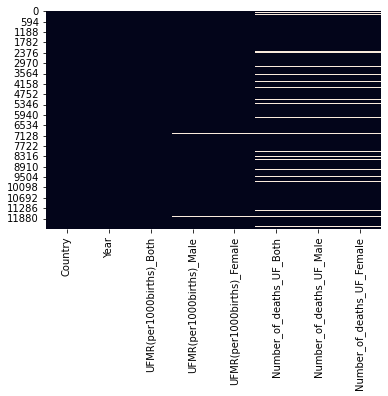

In [499]:
# Check missing data
sns.heatmap(df_ufmr.isnull(), cbar=False)

# Findings: Given this map, missing values randomly happened.

In [500]:
# Save the file as csv
df_merged.to_csv("merged_dataset_v0.1.csv", index=False)

## 1.4. Address the missing values

In [501]:
# 対象の列をリストとして指定
target_columns = [
    'UFMR(per1000births)_Male',
    'UFMR(per1000births)_Female',
    'Number_of_deaths_UF_Both',
    'Number_of_deaths_UF_Male',
    'Number_of_deaths_UF_Female',
    'Early initiation of breastfeeding (%)',
    'Infants exclusively breastfed for the first six months of life (%)'
]

# 指定された列に NaN が含まれる行を削除
df_cleaned = df_merged.dropna(subset=target_columns)

# 結果の確認
print(f"元のデータフレーム行数: {len(df_merged)}")
print(f"NaN を削除後の行数: {len(df_cleaned)}")

元のデータフレーム行数: 12468
NaN を削除後の行数: 383


In [504]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 9 to 12434
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             383 non-null    object 
 1   Year                                                                383 non-null    int64  
 2   UFMR(per1000births)_Both                                            383 non-null    float64
 3   UFMR(per1000births)_Male                                            383 non-null    float64
 4   UFMR(per1000births)_Female                                          383 non-null    float64
 5   Number_of_deaths_UF_Both                                            383 non-null    float64
 6   Number_of_deaths_UF_Male                                            383 non-null    float64
 7   Number_of_death

In [506]:
df_cleaned.describe()

,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
count,383.000000,383.000000,383.000000,383.000000,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,383.000000
mean,2007.297650,66.830888,71.276345,62.151671,7.465180e+04,3.990769e+04,3.474411e+04,47.686423,34.819060
std,6.082347,49.075248,51.040181,47.068021,2.138363e+05,1.095614e+05,1.044735e+05,18.080238,20.397564
min,1991.000000,4.860000,5.280000,4.220000,8.000000e+00,4.000000e+00,4.000000e+00,6.000000,0.100000
25%,2004.000000,26.175000,28.845000,23.140000,4.612000e+03,2.610500e+03,2.008500e+03,34.350000,18.100000
50%,2008.000000,55.210000,60.000000,49.910000,2.221900e+04,1.239900e+04,1.018800e+04,48.100000,32.500000
75%,2012.000000,99.860000,105.105000,92.230000,7.356600e+04,3.980100e+04,3.343350e+04,60.450000,50.700000
max,2018.000000,316.640000,319.910000,313.070000,2.672618e+06,1.330384e+06,1.342234e+06,94.500000,88.400000


In [507]:
# Save the file as csv
df_cleaned.to_csv("cleaned_dataset_v0.1.csv", index=False)

## 2. EDA (Exploratory Data Analysis)

In [702]:
df = pd.read_csv('cleaned_dataset_v0.1.csv')
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
0,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0,35.7,25.4
1,Algeria,2006,32.34,34.42,30.10,22698.0,12399.0,10299.0,49.5,6.9
2,Angola,2015,88.34,95.01,81.18,100216.0,54635.0,45581.0,48.3,37.4
3,Benin,2014,100.13,106.74,93.10,39709.0,21615.0,18094.0,46.6,41.4
4,Benin,2012,104.60,111.33,97.46,39244.0,21327.0,17917.0,50.4,32.5


In [703]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Country                                                             383 non-null    object 
 1   Year                                                                383 non-null    int64  
 2   UFMR(per1000births)_Both                                            383 non-null    float64
 3   UFMR(per1000births)_Male                                            383 non-null    float64
 4   UFMR(per1000births)_Female                                          383 non-null    float64
 5   Number_of_deaths_UF_Both                                            383 non-null    float64
 6   Number_of_deaths_UF_Male                                            383 non-null    float64
 7   Number_of_deaths_

In [704]:
df.describe()

,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%)
count,383.000000,383.000000,383.000000,383.000000,3.830000e+02,3.830000e+02,3.830000e+02,383.000000,383.000000
mean,2007.297650,66.830888,71.276345,62.151671,7.465180e+04,3.990769e+04,3.474411e+04,47.686423,34.819060
std,6.082347,49.075248,51.040181,47.068021,2.138363e+05,1.095614e+05,1.044735e+05,18.080238,20.397564
min,1991.000000,4.860000,5.280000,4.220000,8.000000e+00,4.000000e+00,4.000000e+00,6.000000,0.100000
25%,2004.000000,26.175000,28.845000,23.140000,4.612000e+03,2.610500e+03,2.008500e+03,34.350000,18.100000
50%,2008.000000,55.210000,60.000000,49.910000,2.221900e+04,1.239900e+04,1.018800e+04,48.100000,32.500000
75%,2012.000000,99.860000,105.105000,92.230000,7.356600e+04,3.980100e+04,3.343350e+04,60.450000,50.700000
max,2018.000000,316.640000,319.910000,313.070000,2.672618e+06,1.330384e+06,1.342234e+06,94.500000,88.400000


In [705]:
pd.unique(df["Country"])

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', "Cote d'Ivoire", 'Cabo Verde', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Democratic Republic of the Congo', 'Eritrea', 'Eswatini',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'South Sudan', 'Togo', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Argentina',
       'Barbados', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras',
       'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Saint Lucia', 'Suriname', 'Trinidad and Tob

In [706]:
# Add region
region_mapping = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', "Cote d'Ivoire": 'Africa', 'Cabo Verde': 'Africa', 'Cameroon': 'Africa',
    'Central African Republic': 'Africa', 'Chad': 'Africa', 'Comoros': 'Africa', 'Congo': 'Africa',
    'Democratic Republic of the Congo': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Ghana': 'Africa', 'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa', 'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Madagascar': 'Africa',
    'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa',
    'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa', 'Senegal': 'Africa',
    'Sierra Leone': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa', 'Togo': 'Africa', 'Uganda': 'Africa',
    'United Republic of Tanzania': 'Africa', 'Zambia': 'Africa', 'Zimbabwe': 'Africa',

    # South America
    'Argentina': 'South America', 'Barbados': 'South America', 'Belize': 'South America', 
    'Bolivia (Plurinational State of)': 'South America', 'Brazil': 'South America', 'Colombia': 'South America', 
    'Costa Rica': 'South America', 'Cuba': 'South America', 'Dominican Republic': 'South America', 'Ecuador': 'South America',
    'El Salvador': 'South America', 'Guatemala': 'South America', 'Guyana': 'South America', 'Haiti': 'South America',
    'Honduras': 'South America', 'Jamaica': 'South America', 'Mexico': 'South America', 'Nicaragua': 'South America',
    'Panama': 'South America', 'Paraguay': 'South America', 'Peru': 'South America', 'Saint Lucia': 'South America', 
    'Suriname': 'South America', 'Trinidad and Tobago': 'South America', 'Uruguay': 'South America',

    # Middle East and North Africa (MENA)
    'Afghanistan': 'Middle East and North Africa', 'Djibouti': 'Middle East and North Africa', 'Egypt': 'Middle East and North Africa', 'Iran (Islamic Republic of)': 'Middle East and North Africa', 'Iraq': 'Middle East and North Africa',
    'Jordan': 'Middle East and North Africa', 'Morocco': 'Middle East and North Africa', 'Oman': 'Middle East and North Africa', 'Pakistan': 'Middle East and North Africa', 'Qatar': 'Middle East and North Africa', 'Somalia': 'Middle East and North Africa',
    'Sudan': 'Middle East and North Africa', 'Syrian Arab Republic': 'Middle East and North Africa', 'Tunisia': 'Middle East and North Africa', 'Yemen': 'Middle East and North Africa',

    # Eastern Europe and Central Asia
    'Albania': 'Eastern Europe', 'Armenia': 'Eastern Europe', 'Azerbaijan': 'Eastern Europe', 'Belarus': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe', 'Georgia': 'Eastern Europe', 'Kazakhstan': 'Central Asia', 
    'Kyrgyzstan': 'Central Asia', 'Montenegro': 'Eastern Europe', 'North Macedonia': 'Eastern Europe', 
    'Republic of Moldova': 'Eastern Europe', 'Romania': 'Eastern Europe', 'Serbia': 'Eastern Europe',
    'Turkiye': 'Eastern Europe', 'Tajikistan': 'Central Asia', 'Turkmenistan': 'Central Asia', 'Ukraine': 'Eastern Europe',
    'Uzbekistan': 'Central Asia',

    # South Asia
    'Bangladesh': 'South Asia', 'Bhutan': 'South Asia', "Democratic People's Republic of Korea": 'South Asia',
    'India': 'South Asia', 'Indonesia': 'South Asia', 'Maldives': 'South Asia', 'Myanmar': 'South Asia', 
    'Nepal': 'South Asia', 'Sri Lanka': 'South Asia', 'Thailand': 'South Asia', 'Timor-Leste': 'South Asia',

    # East Asia and Pacific
    'Cambodia': 'East Asia and Pacific', 'China': 'East Asia and Pacific', 'Fiji': 'East Asia and Pacific',
    "Lao People's Democratic Republic": 'East Asia and Pacific', 'Marshall Islands': 'East Asia and Pacific', 
    'Mongolia': 'East Asia and Pacific', 'Nauru': 'East Asia and Pacific', 'Philippines': 'East Asia and Pacific', 
    'Samoa': 'East Asia and Pacific', 'Solomon Islands': 'East Asia and Pacific', 'Tonga': 'East Asia and Pacific', 
    'Tuvalu': 'East Asia and Pacific', 'Vanuatu': 'East Asia and Pacific', 'Viet Nam': 'East Asia and Pacific'
}

df['Region'] = df['Country'].map(region_mapping)
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region
0,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0,35.7,25.4,Africa
1,Algeria,2006,32.34,34.42,30.10,22698.0,12399.0,10299.0,49.5,6.9,Africa
2,Angola,2015,88.34,95.01,81.18,100216.0,54635.0,45581.0,48.3,37.4,Africa
3,Benin,2014,100.13,106.74,93.10,39709.0,21615.0,18094.0,46.6,41.4,Africa
4,Benin,2012,104.60,111.33,97.46,39244.0,21327.0,17917.0,50.4,32.5,Africa


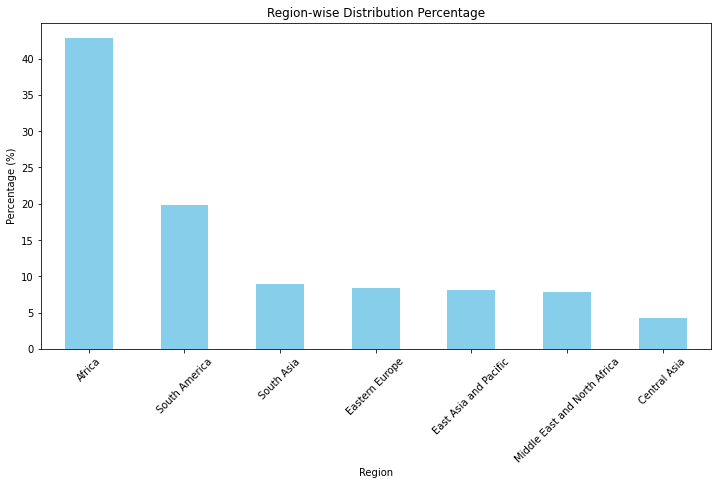

Africa                          42.819843
South America                   19.843342
South Asia                       8.877285
Eastern Europe                   8.355091
East Asia and Pacific            8.093995
Middle East and North Africa     7.832898
Central Asia                     4.177546
Name: Region, dtype: float64

In [558]:
# Region　Rates
region_counts = df['Region'].value_counts(normalize=True) * 100

region_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Region-wise Distribution Percentage")
plt.ylabel("Percentage (%)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

region_counts

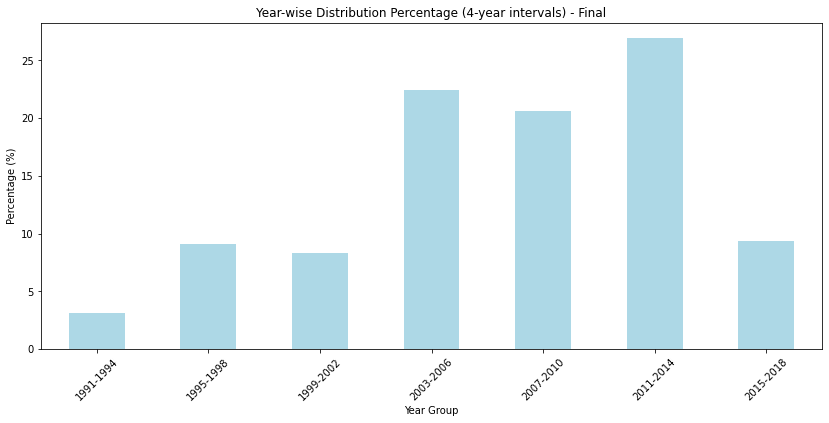

1991-1994     3.133159
1995-1998     9.138381
1999-2002     8.355091
2003-2006    22.454308
2007-2010    20.626632
2011-2014    26.892950
2015-2018     9.399478
Name: YearGroup_Final, dtype: float64

In [560]:
# Year Rates
bins_final = list(range(1991, 2019+1, 4))  # 1991から2019まで4年ごとに区切る
labels_final = [f'{year}-{year+3}' for year in bins_final[:-1]]  # ラベルを作成

df['YearGroup_Final'] = pd.cut(df['Year'], bins=bins_final, labels=labels_final, right=False)

year_group_counts_final = df['YearGroup_Final'].value_counts(normalize=True) * 100


year_group_counts_final.sort_index().plot(kind='bar', figsize=(14, 6), color='lightblue')
plt.title("Year-wise Distribution Percentage (4-year intervals) - Final")
plt.ylabel("Percentage (%)")
plt.xlabel("Year Group")
plt.xticks(rotation=45)
plt.show()

year_group_counts_final.sort_index()

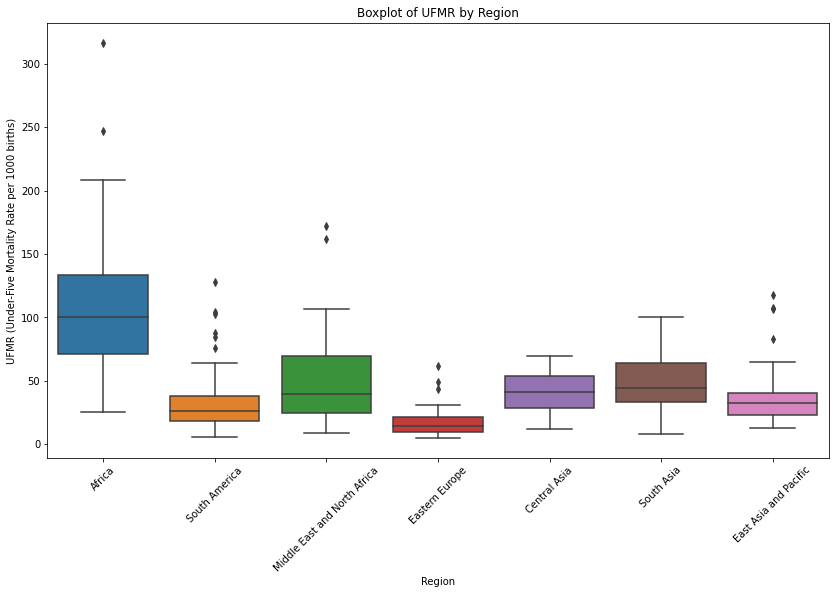

In [562]:
# 1. リージョン毎の UFMR の箱ひげ図
plt.figure(figsize=(14, 8))
sns.boxplot(x='Region', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by Region")
plt.xticks(rotation=45)  # x軸ラベルを回転
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("Region")
plt.show()

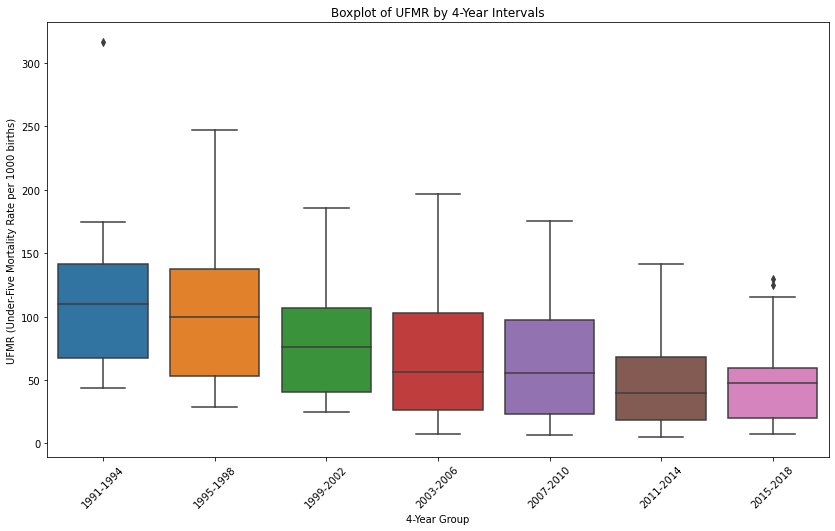

In [564]:
# 2. 4年区切りの UFMR の箱ひげ図
plt.figure(figsize=(14, 8))
sns.boxplot(x='YearGroup_Final', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by 4-Year Intervals")
plt.xticks(rotation=45)  # x軸ラベルを回転
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("4-Year Group")
plt.show()

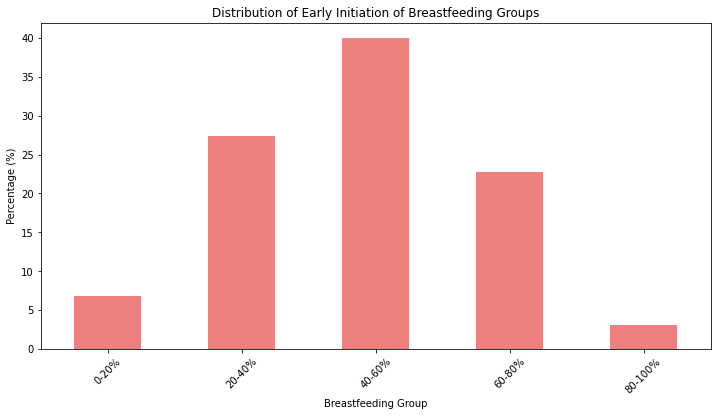

In [566]:
# 1. 「Early initiation of breastfeeding (%)」を20%ずつにグループ化
bins_breastfeeding = [0, 20, 40, 60, 80, 100]  # 0から100までを20%ごとに区切る
labels_breastfeeding = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']  # グループのラベル

# グループ化して新しい列を追加
df['Breastfeeding_Group'] = pd.cut(df['Early initiation of breastfeeding (%)'], 
                                          bins=bins_breastfeeding, labels=labels_breastfeeding, right=False)

# 2. 各グループの全体に占める割合を計算
breastfeeding_group_counts = df['Breastfeeding_Group'].value_counts(normalize=True) * 100

# 棒グラフで可視化
breastfeeding_group_counts.sort_index().plot(kind='bar', figsize=(12, 6), color='lightcoral')
plt.title("Distribution of Early Initiation of Breastfeeding Groups")
plt.ylabel("Percentage (%)")
plt.xlabel("Breastfeeding Group")
plt.xticks(rotation=45)
plt.show()

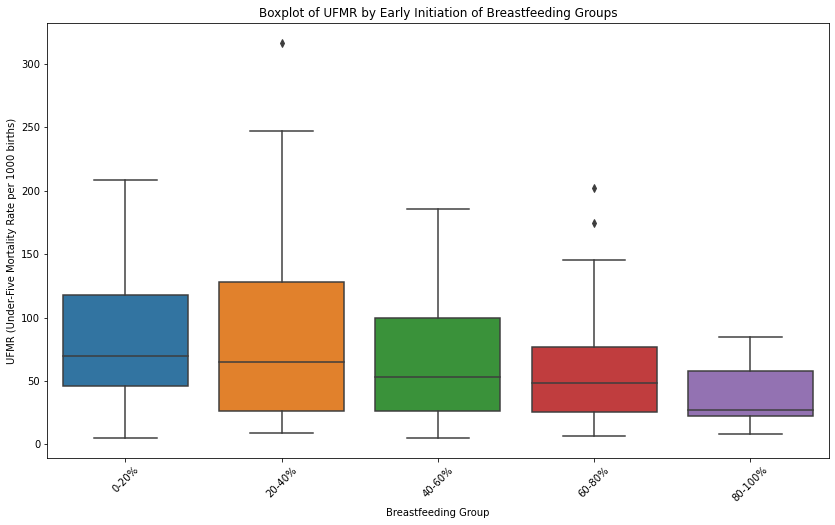

In [570]:
# 3. UFMRの箱ひげ図をグループごとに作成
plt.figure(figsize=(14, 8))
sns.boxplot(x='Breastfeeding_Group', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by Early Initiation of Breastfeeding Groups")
plt.xticks(rotation=45)  # x軸ラベルを回転
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("Breastfeeding Group")
plt.show()

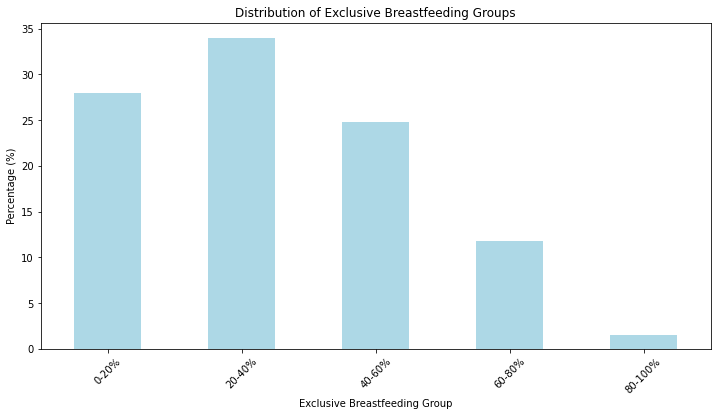

In [567]:
# 1. 「Infants exclusively breastfed for the first six months of life (%)」を20%ずつにグループ化
bins_exclusive = [0, 20, 40, 60, 80, 100]  # 0から100までを20%ごとに区切る
labels_exclusive = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']  # グループのラベル

# グループ化して新しい列を追加
df['Exclusive_Breastfeeding_Group'] = pd.cut(df['Infants exclusively breastfed for the first six months of life (%)'], 
                                             bins=bins_exclusive, labels=labels_exclusive, right=False)

# 2. 各グループの全体に占める割合を計算
exclusive_group_counts = df['Exclusive_Breastfeeding_Group'].value_counts(normalize=True) * 100

# 棒グラフで可視化
exclusive_group_counts.sort_index().plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.title("Distribution of Exclusive Breastfeeding Groups")
plt.ylabel("Percentage (%)")
plt.xlabel("Exclusive Breastfeeding Group")
plt.xticks(rotation=45)
plt.show()

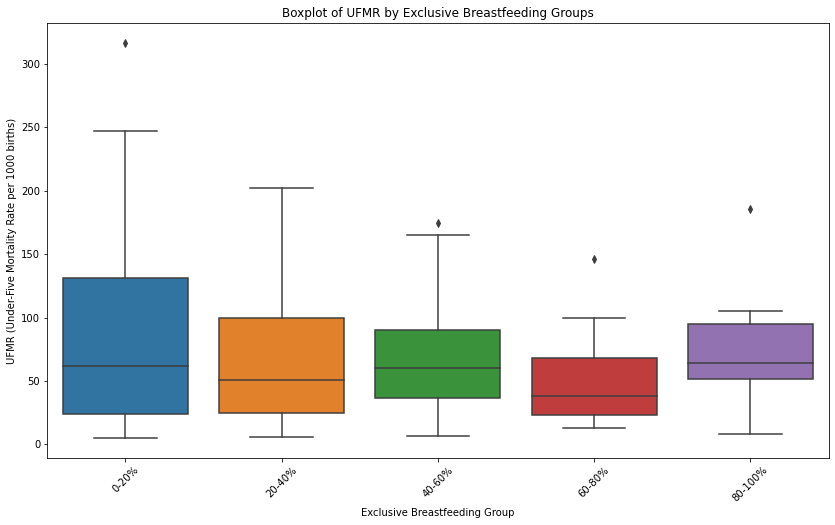

In [568]:
# 3. UFMRの箱ひげ図をグループごとに作成
plt.figure(figsize=(14, 8))
sns.boxplot(x='Exclusive_Breastfeeding_Group', y='UFMR(per1000births)_Both', data=df)
plt.title("Boxplot of UFMR by Exclusive Breastfeeding Groups")
plt.xticks(rotation=45)  # x軸ラベルを回転
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.xlabel("Exclusive Breastfeeding Group")
plt.show()

In [512]:
import matplotlib.pyplot as plt
import seaborn as sns

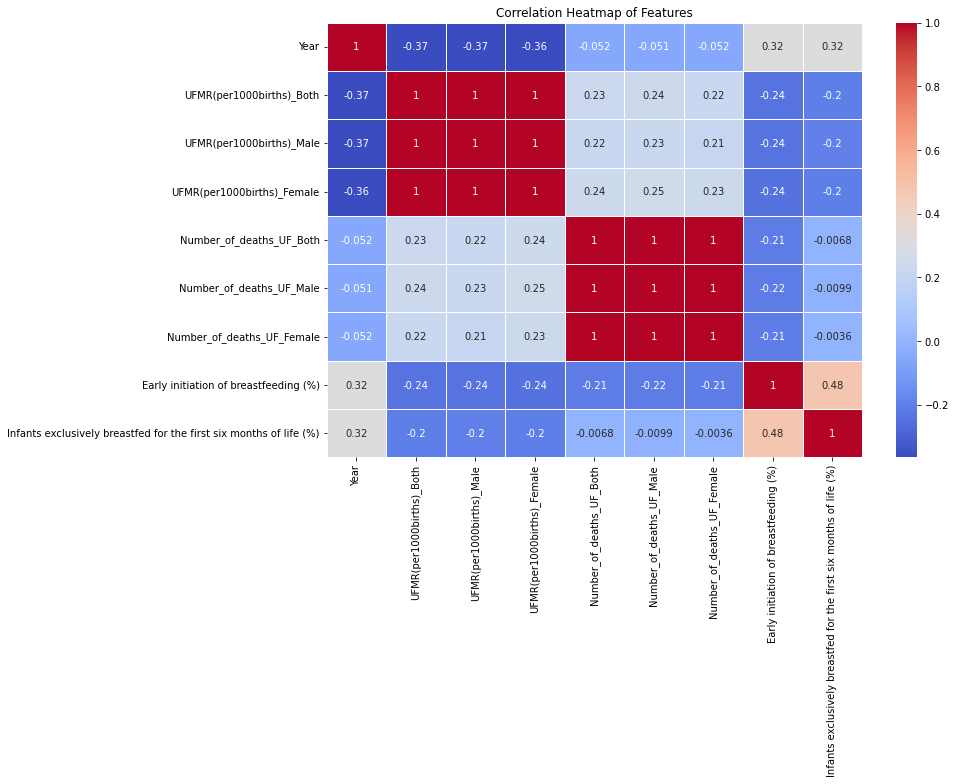

In [530]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

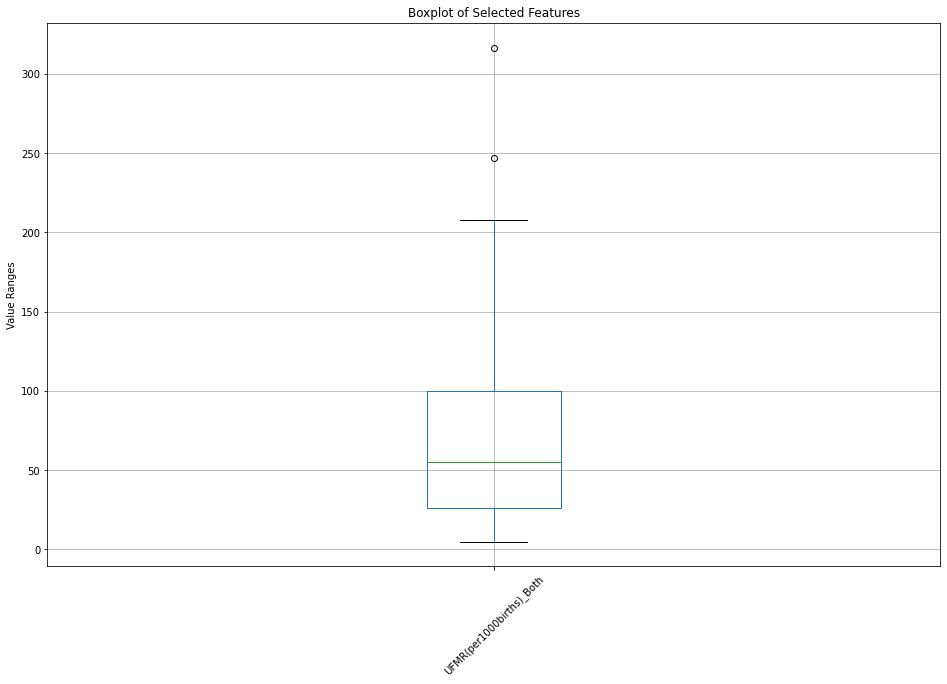

In [517]:
#　Confirm Outlier
columns_to_plot = [
    'UFMR(per1000births)_Both'
]

# 選択した列の箱ひげ図をプロット
plt.figure(figsize=(16, 10))
df[columns_to_plot].boxplot()
plt.title("Boxplot of Selected Features")
plt.xticks(rotation=45) 
plt.ylabel("Value Ranges")
plt.show()


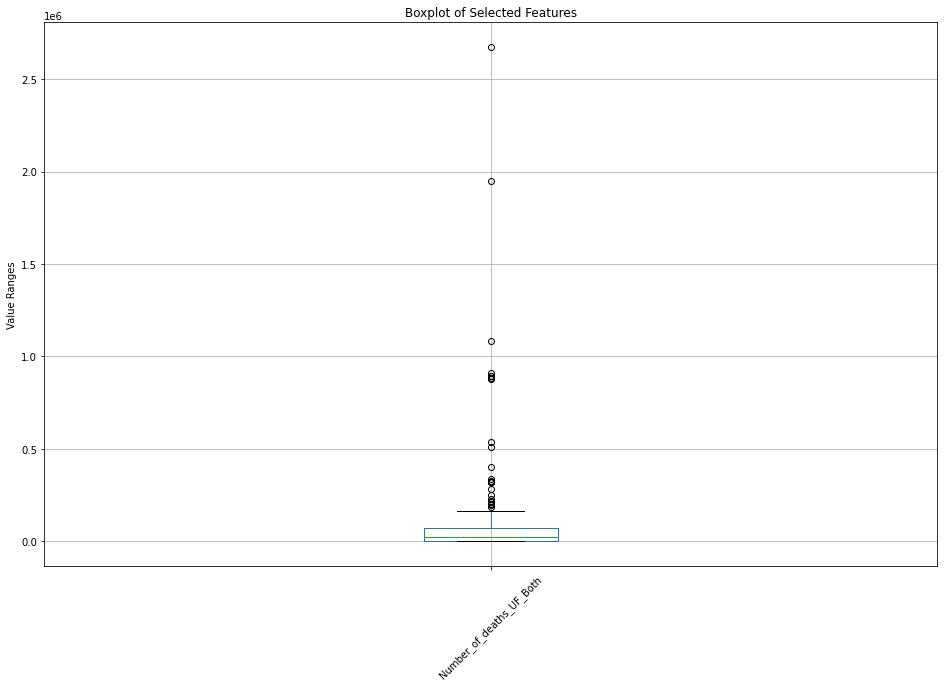

In [518]:
#　Confirm Outlier
columns_to_plot = [
    'Number_of_deaths_UF_Both'
]

# 選択した列の箱ひげ図をプロット
plt.figure(figsize=(16, 10))
df[columns_to_plot].boxplot()
plt.title("Boxplot of Selected Features")
plt.xticks(rotation=45) 
plt.ylabel("Value Ranges")
plt.show()

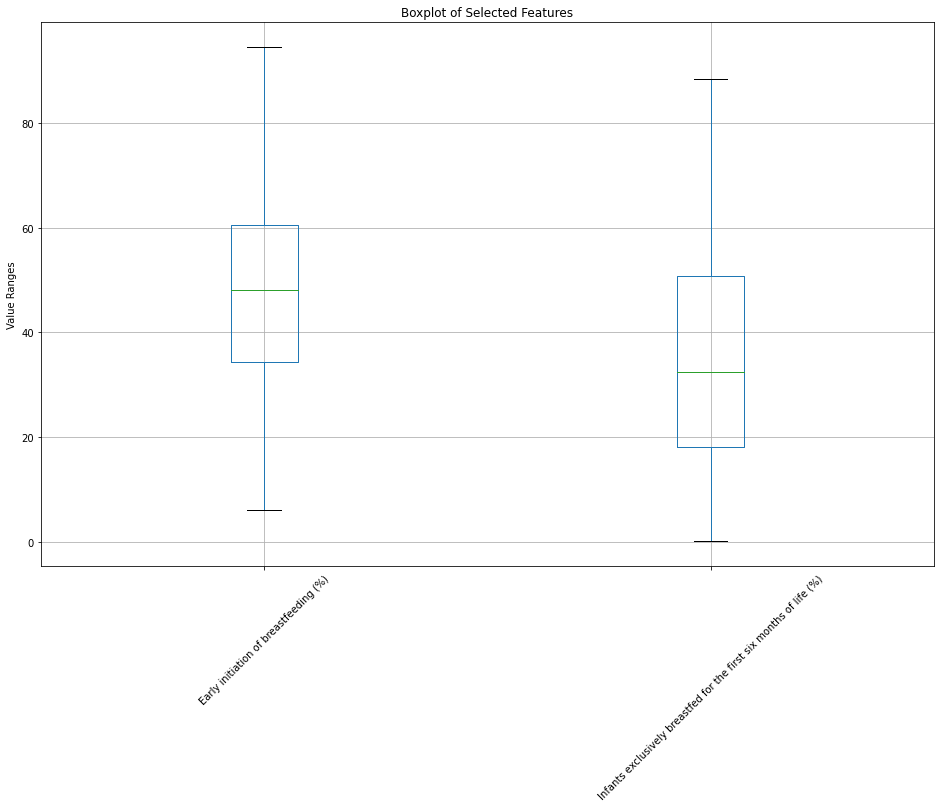

In [519]:
#　Confirm Outlier
columns_to_plot = [
    'Early initiation of breastfeeding (%)',
    'Infants exclusively breastfed for the first six months of life (%)'
]

# 選択した列の箱ひげ図をプロット
plt.figure(figsize=(16, 10))
df[columns_to_plot].boxplot()
plt.title("Boxplot of Selected Features")
plt.xticks(rotation=45) 
plt.ylabel("Value Ranges")
plt.show()

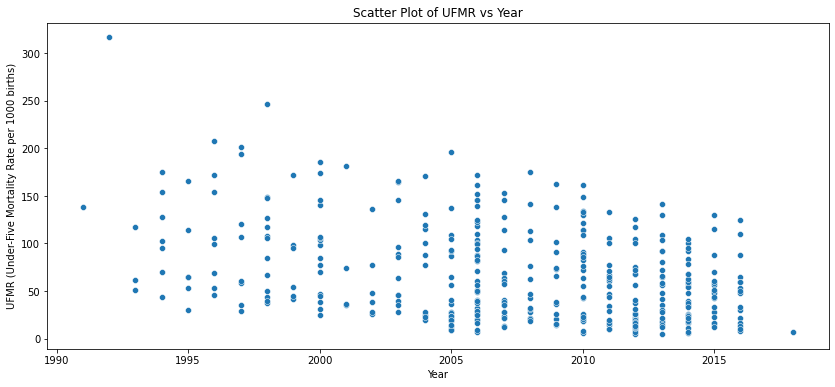

In [571]:
# 1. UFMRとYearの散布図
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Year', y='UFMR(per1000births)_Both', data=df)
plt.title("Scatter Plot of UFMR vs Year")
plt.xlabel("Year")
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.show()

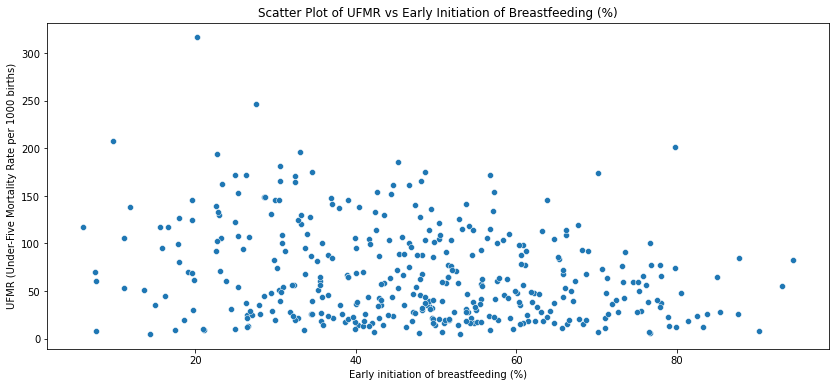

In [572]:
# 2. UFMRとEarly initiation of breastfeeding (%)の散布図
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Early initiation of breastfeeding (%)', y='UFMR(per1000births)_Both', data=df)
plt.title("Scatter Plot of UFMR vs Early Initiation of Breastfeeding (%)")
plt.xlabel("Early initiation of breastfeeding (%)")
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.show()

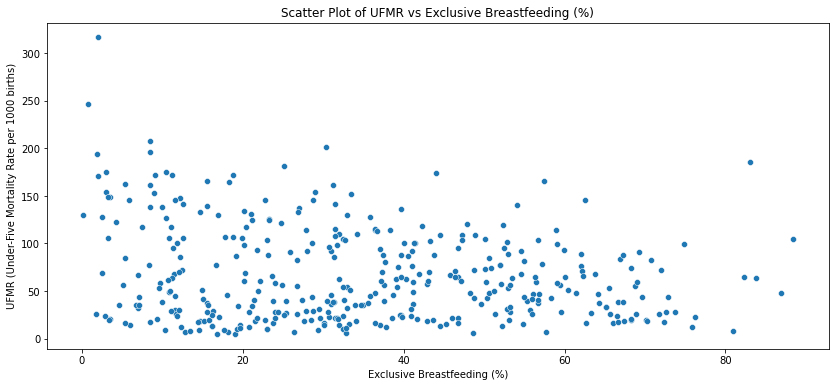

In [573]:
# 3. UFMRとInfants exclusively breastfed for the first six months of life (%)の散布図
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Infants exclusively breastfed for the first six months of life (%)', 
                y='UFMR(per1000births)_Both', data=df)
plt.title("Scatter Plot of UFMR vs Exclusive Breastfeeding (%)")
plt.xlabel("Exclusive Breastfeeding (%)")
plt.ylabel("UFMR (Under-Five Mortality Rate per 1000 births)")
plt.show()

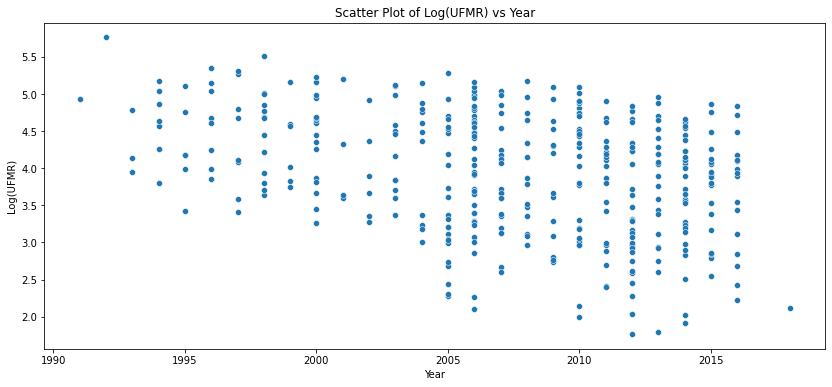

In [574]:
import numpy as np

# UFMRの対数変換列を作成
df['Log_UFMR'] = np.log(df['UFMR(per1000births)_Both'] + 1)  # log(0)を避けるため+1

# 変換後の散布図を作成
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Year', y='Log_UFMR', data=df)
plt.title("Scatter Plot of Log(UFMR) vs Year")
plt.xlabel("Year")
plt.ylabel("Log(UFMR)")
plt.show()

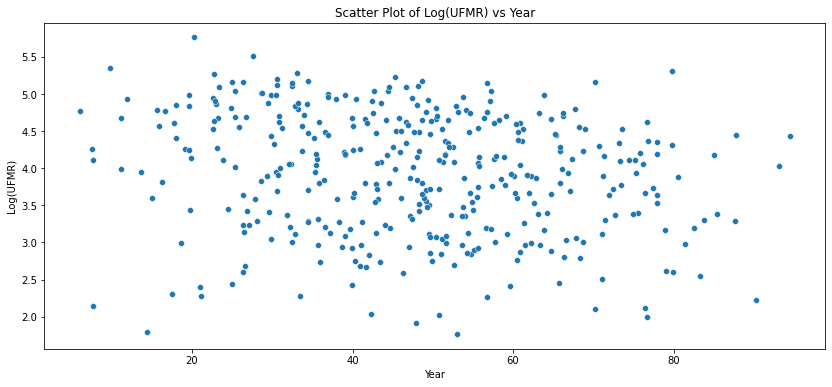

In [575]:
# 変換後の散布図を作成
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Early initiation of breastfeeding (%)', y='Log_UFMR', data=df)
plt.title("Scatter Plot of Log(UFMR) vs Year")
plt.xlabel("Year")
plt.ylabel("Log(UFMR)")
plt.show()

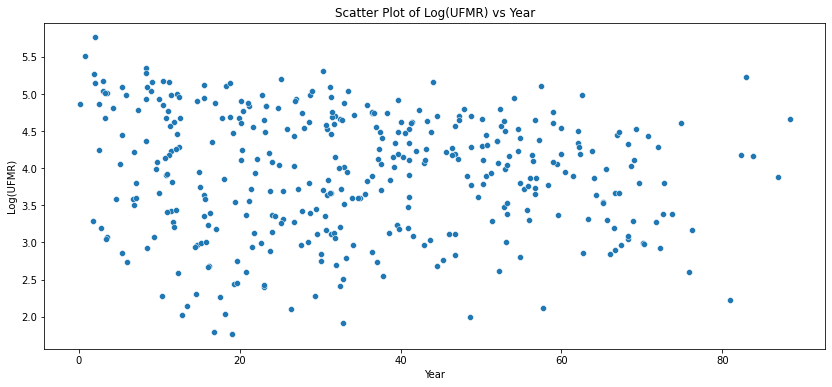

In [576]:
# 変換後の散布図を作成
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Infants exclusively breastfed for the first six months of life (%)', y='Log_UFMR', data=df)
plt.title("Scatter Plot of Log(UFMR) vs Year")
plt.xlabel("Year")
plt.ylabel("Log(UFMR)")
plt.show()

In [577]:
from sklearn.preprocessing import StandardScaler

# 標準化のためのスケーラーを定義
scaler = StandardScaler()

# UFMRの標準化
df['Standardized_UFMR'] = scaler.fit_transform(df[['UFMR(per1000births)_Both']])

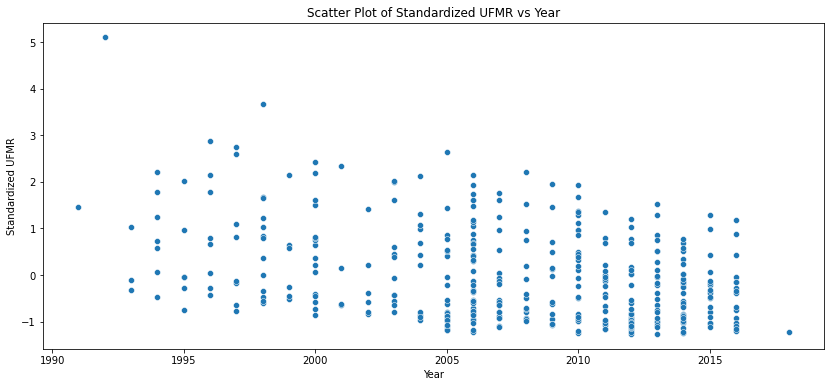

In [578]:
# 標準化後の散布図を作成
# 1. Standardized UFMRとYearの散布図
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Year', y='Standardized_UFMR', data=df)
plt.title("Scatter Plot of Standardized UFMR vs Year")
plt.xlabel("Year")
plt.ylabel("Standardized UFMR")
plt.show()


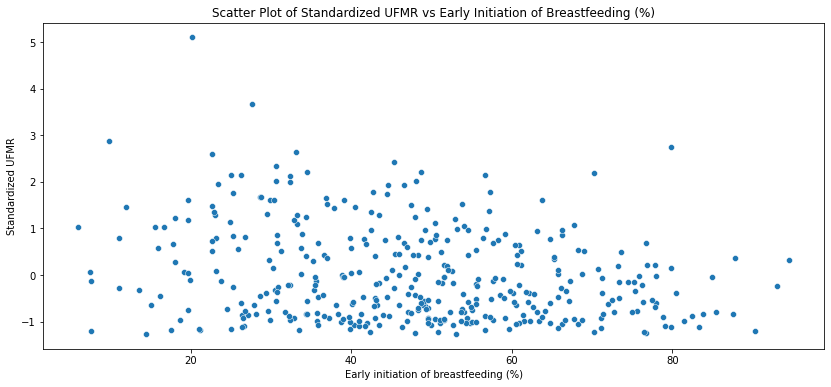

In [579]:
# 2. Standardized UFMRとEarly initiation of breastfeeding (%)の散布図
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Early initiation of breastfeeding (%)', y='Standardized_UFMR', data=df)
plt.title("Scatter Plot of Standardized UFMR vs Early Initiation of Breastfeeding (%)")
plt.xlabel("Early initiation of breastfeeding (%)")
plt.ylabel("Standardized UFMR")
plt.show()


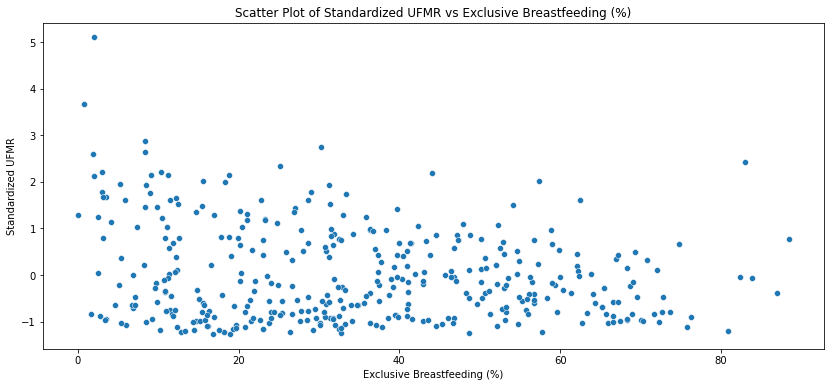

In [580]:
# 3. Standardized UFMRとInfants exclusively breastfed for the first six months of life (%)の散布図
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Infants exclusively breastfed for the first six months of life (%)', 
                y='Standardized_UFMR', data=df)
plt.title("Scatter Plot of Standardized UFMR vs Exclusive Breastfeeding (%)")
plt.xlabel("Exclusive Breastfeeding (%)")
plt.ylabel("Standardized UFMR")
plt.show()


### Memo (EDA)
- Given the results of EDA, it cannot be seen the linear relationships between target feature and other features; thus, Linear Regression model could not be suitable for this data.

## 3. Experiments of implementing AI/ML algorithms
### 3.1. Decision Trees

In [581]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 説明変数と目的変数の設定
features = ['Year', 'Early initiation of breastfeeding (%)', 
            'Infants exclusively breastfed for the first six months of life (%)']
target = 'UFMR(per1000births)_Both'

In [582]:
# 特徴量と目的変数の分割
X = df[features]
y = df[target]

In [583]:
# データを学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [605]:
# シンプルな回帰木を定義（max_depth=3で深さを制限）
simple_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
simple_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [606]:
# 予測
y_train_pred = simple_tree.predict(X_train)
y_test_pred = simple_tree.predict(X_test)

In [607]:
# 評価指標（R-squaredとMean Squared Error）
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2, test_r2, train_mse, test_mse

(0.2505890020024343,
 0.023425425051055493,
 1785.1383364587114,
 2317.186606475488)

In [608]:
# pandasのget_dummiesを使ってOne-Hot Encodingを実施
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)  # One-Hot Encodingし、最初のカテゴリは基準として削除

# エンコーディング後の新しい特徴量を表示
encoded_features = df_encoded.columns.tolist()
encoded_features

['Country',
 'Year',
 'UFMR(per1000births)_Both',
 'UFMR(per1000births)_Male',
 'UFMR(per1000births)_Female',
 'Number_of_deaths_UF_Both',
 'Number_of_deaths_UF_Male',
 'Number_of_deaths_UF_Female',
 'Early initiation of breastfeeding (%)',
 'Infants exclusively breastfed for the first six months of life (%)',
 'YearGroup_Final',
 'Breastfeeding_Group',
 'Exclusive_Breastfeeding_Group',
 'Log_UFMR',
 'Standardized_UFMR',
 'Region_Central Asia',
 'Region_East Asia and Pacific',
 'Region_Eastern Europe',
 'Region_Middle East and North Africa',
 'Region_South America',
 'Region_South Asia']

In [613]:
# 説明変数と目的変数の設定（新しい特徴量を含める）
features = ['Year', 'Early initiation of breastfeeding (%)', 
            'Infants exclusively breastfed for the first six months of life (%)'] + \
           [col for col in df_encoded.columns if col.startswith("Region_")]
target = 'UFMR(per1000births)_Both'

# 特徴量と目的変数の分割
X = df_encoded[features]
y = df_encoded[target]

# データを学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [669]:

# シンプルな回帰木を定義（max_depth=10、min_samples_split=10で深さを制限）
simple_tree_region = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
simple_tree_region.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [670]:

# 予測
y_train_pred_region = simple_tree_region.predict(X_train)
y_test_pred_region = simple_tree_region.predict(X_test)


In [671]:

# 評価指標（R-squaredとMean Squared Error）
train_r2_region = r2_score(y_train, y_train_pred_region)
test_r2_region = r2_score(y_test, y_test_pred_region)
train_mse_region = mean_squared_error(y_train, y_train_pred_region)
test_mse_region = mean_squared_error(y_test, y_test_pred_region)

print(f"Training R-squared (Region): {train_r2_region:.4f}")
print(f"Test R-squared (Region): {test_r2_region:.4f}")
print(f"Training MSE (Region): {train_mse_region:.2f}")
print(f"Test MSE (Region): {test_mse_region:.2f}")

Training R-squared (Region): 0.5635
Test R-squared (Region): 0.4173
Training MSE (Region): 1039.65
Test MSE (Region): 1382.68


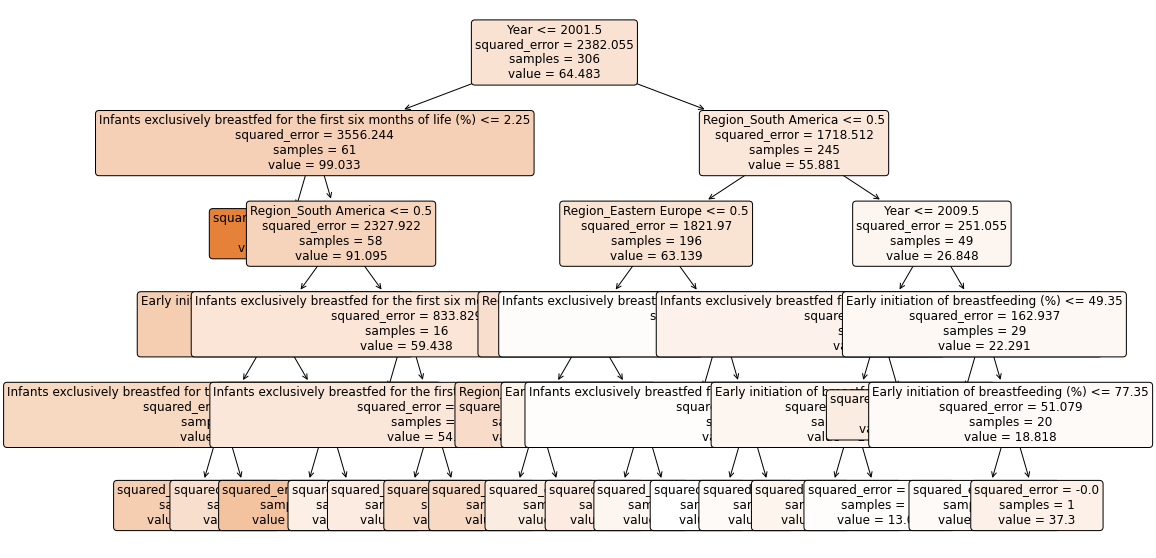

In [672]:
from sklearn.tree import plot_tree

# シンプルな回帰木モデルを表示（例: simple_tree_region）
plt.figure(figsize=(16, 10))  # 図のサイズを指定
plot_tree(simple_tree_region, 
          feature_names=features,  # 特徴量の名前
          filled=True,  # ノードを色付け
          rounded=True,  # ノードの形を丸くする
          fontsize=12)  # フォントサイズを指定
plt.show()

### Memo (3.1. Decision Trees)
- Given the results of Decision tree, it could be a challenge to explain the interpretations.
- "Region" of features played a vital role to improve the model performance; however, MSE did not meet the sufficient value.

### 3.2. Naive Bayes

In [676]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import classification_report, confusion_matrix

In [673]:
# 1. 目的変数 (UFMR) のカテゴリ化（4分位に分割）
# 目的変数のクラスラベルを設定
risk_labels = ['Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']

# 四分位範囲に基づいてカテゴリを割り当てる
df['UFMR_Category'] = pd.qcut(df['UFMR(per1000births)_Both'], q=4, labels=risk_labels)

# 2. 説明変数の用意（Region を One-Hot Encoding）
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# 3. 説明変数と目的変数の定義
features_naive = ['Year', 'Early initiation of breastfeeding (%)', 
                  'Infants exclusively breastfed for the first six months of life (%)'] + \
                 [col for col in df_encoded.columns if col.startswith("Region_")]
X_naive = df_encoded[features_naive]
y_naive = df_encoded['UFMR_Category']

In [674]:
# 4. データ分割（学習用とテスト用に分割）
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(X_naive, y_naive, test_size=0.2, random_state=42)

In [677]:
# 5. Naive Bayes モデルの定義と学習
nb_model = GaussianNB()
nb_model.fit(X_train_naive, y_train_naive)

GaussianNB()

In [679]:
# 6. 予測と評価
y_train_pred_naive = nb_model.predict(X_train_naive)
y_test_pred_naive = nb_model.predict(X_test_naive)

# 評価結果（混同行列と精度）
conf_matrix = confusion_matrix(y_test_naive, y_test_pred_naive)
class_report = classification_report(y_test_naive, y_test_pred_naive, target_names=risk_labels)

In [684]:
print(conf_matrix)

[[ 2  0  1 14]
 [ 3  2  1  8]
 [ 7  0  0 11]
 [ 1  0  0 27]]


In [682]:
print(class_report)

                precision    recall  f1-score   support

      Low Risk       0.15      0.12      0.13        17
   Medium Risk       1.00      0.14      0.25        14
     High Risk       0.00      0.00      0.00        18
Very High Risk       0.45      0.96      0.61        28

      accuracy                           0.40        77
     macro avg       0.40      0.31      0.25        77
  weighted avg       0.38      0.40      0.30        77



In [685]:
# 1. 目的変数を50%で二分割してリスク分類（Low Risk, High Risk）
risk_labels_binary = ['Low Risk', 'High Risk']  # 2つのクラスラベルを定義

# 四分位数ではなく、50%で二分割して目的変数をカテゴリ化
df['UFMR_Binary_Category'] = pd.qcut(df['UFMR(per1000births)_Both'], q=2, labels=risk_labels_binary)

# 2. One-Hot Encoding（Regionをエンコーディング）
df_encoded_binary = pd.get_dummies(df, columns=['Region'], drop_first=True)

# 3. 説明変数と目的変数の定義
features_binary = ['Year', 'Early initiation of breastfeeding (%)', 
                   'Infants exclusively breastfed for the first six months of life (%)'] + \
                  [col for col in df_encoded_binary.columns if col.startswith("Region_")]
X_binary = df_encoded_binary[features_binary]
y_binary = df_encoded_binary['UFMR_Binary_Category']

In [686]:
# 4. データ分割（学習用とテスト用に分割）
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# 5. Naive Bayes モデルの定義と学習
nb_model_binary = GaussianNB()
nb_model_binary.fit(X_train_binary, y_train_binary)


GaussianNB()

In [688]:

# 6. 予測と評価
y_train_pred_binary = nb_model_binary.predict(X_train_binary)
y_test_pred_binary = nb_model_binary.predict(X_test_binary)



In [689]:
# 評価結果（混同行列と精度）
conf_matrix_binary = confusion_matrix(y_test_binary, y_test_pred_binary)
class_report_binary = classification_report(y_test_binary, y_test_pred_binary, target_names=risk_labels_binary)



In [691]:
print(conf_matrix_binary)

[[43  2]
 [24  8]]


In [692]:
print(class_report_binary)

              precision    recall  f1-score   support

    Low Risk       0.64      0.96      0.77        45
   High Risk       0.80      0.25      0.38        32

    accuracy                           0.66        77
   macro avg       0.72      0.60      0.57        77
weighted avg       0.71      0.66      0.61        77



In [693]:
# 1. 目的変数を再定義（UFMRが25以下を「目標達成」、26以上を「目標未達」）
sdgs_labels = ['Target Achieved', 'Target Not Achieved']  # 2つのクラスラベルを定義

In [694]:

# 目標達成基準に基づいて目的変数をカテゴリ化
df['UFMR_SDGS_Category'] = pd.cut(df['UFMR(per1000births)_Both'], bins=[0, 25, float('inf')], labels=sdgs_labels)

# 2. One-Hot Encoding（Regionをエンコーディング）
df_encoded_sdgs = pd.get_dummies(df, columns=['Region'], drop_first=True)

# 3. 説明変数と目的変数の定義
features_sdgs = ['Year', 'Early initiation of breastfeeding (%)', 
                 'Infants exclusively breastfed for the first six months of life (%)'] + \
                [col for col in df_encoded_sdgs.columns if col.startswith("Region_")]
X_sdgs = df_encoded_sdgs[features_sdgs]
y_sdgs = df_encoded_sdgs['UFMR_SDGS_Category']



In [695]:
# 4. データ分割（学習用とテスト用に分割）
X_train_sdgs, X_test_sdgs, y_train_sdgs, y_test_sdgs = train_test_split(X_sdgs, y_sdgs, test_size=0.2, random_state=42)

# 5. Naive Bayes モデルの定義と学習
nb_model_sdgs = GaussianNB()
nb_model_sdgs.fit(X_train_sdgs, y_train_sdgs)

GaussianNB()

In [696]:
# 6. 予測と評価
y_train_pred_sdgs = nb_model_sdgs.predict(X_train_sdgs)
y_test_pred_sdgs = nb_model_sdgs.predict(X_test_sdgs)


In [697]:
# 評価結果（混同行列と精度）
conf_matrix_sdgs = confusion_matrix(y_test_sdgs, y_test_pred_sdgs)
class_report_sdgs = classification_report(y_test_sdgs, y_test_pred_sdgs, target_names=sdgs_labels)

print(conf_matrix_sdgs)

[[ 7  6]
 [ 3 61]]


In [698]:
print(class_report_sdgs)

                     precision    recall  f1-score   support

    Target Achieved       0.70      0.54      0.61        13
Target Not Achieved       0.91      0.95      0.93        64

           accuracy                           0.88        77
          macro avg       0.81      0.75      0.77        77
       weighted avg       0.87      0.88      0.88        77



In [720]:
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,UFMR_SDGS_Category
0,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0,35.7,25.4,Africa,Target Not Achieved
1,Algeria,2006,32.34,34.42,30.10,22698.0,12399.0,10299.0,49.5,6.9,Africa,Target Not Achieved
2,Angola,2015,88.34,95.01,81.18,100216.0,54635.0,45581.0,48.3,37.4,Africa,Target Not Achieved
3,Benin,2014,100.13,106.74,93.10,39709.0,21615.0,18094.0,46.6,41.4,Africa,Target Not Achieved
4,Benin,2012,104.60,111.33,97.46,39244.0,21327.0,17917.0,50.4,32.5,Africa,Target Not Achieved


In [719]:
# Save the file as csv
df.to_csv("cleaned_dataset_v0.2.csv", index=False)

### 3.2. Memo (Naive Bayes)
- The third trial is much better than the two trials; however, target achieved is low performance.
- The possible reason for this is that European and north america data is less than other regions, meaning the countries that might achieve the SDGs target are less in this model. So this is limitation in this project.
- According to UNICEF, the target number of UFMR is 25 death per 1000; I think that under 25 recognise as low risk, over 25 recognise high risk. https://data.unicef.org/topic/child-survival/child-survival-sdgs/#:~:text=The%20proposed%20SDG%20target%20for,deaths%20per%201%2C000%20live%20births.


### 3.3. K-means

### 3.4. Artificial Neural Networks (ANNs)

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report